# K-Means Clustering for Classification

Here we follow the Mudassir Khan's [blog](https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a), where K-means clustering was shown to be useful for classification. In this note, we will first implement k-means clustering to generate a new feature, and then show the additional feature is able to improves classification model. The procedures are

$$\textrm{Use clustering to generate labels as feature} \to \textrm{perform classification model with the additional feature} $$

The demonstrated example implements the MNIST dataset on the combined machine learning model. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

## MNIST dataset

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

There are 1797 observations (images), and each observation has 8x8 pixel to represent a number:

4


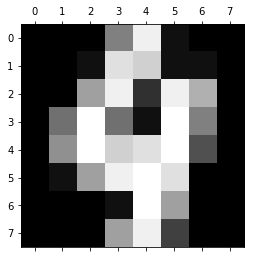

In [24]:
print (digits.target[14])
plt.gray() 
plt.matshow(digits.images[14]) 
plt.show() 

## Split training/test dataset

In [25]:
X, Y = pd.DataFrame(digits.data), digits.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1257, 64), (540, 64))

## Classification

Here we first use SVC and LogisticRegression on the MNIST dataset. There are 64 features on each data point.

In [23]:
def classify(X_train, y_train, model=LogisticRegression(random_state=42)):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred)))

In [27]:
classify(X_train, y_train, model=SVC())

Accuracy: 0.3925925925925926


In [26]:
classify(X_train, y_train, model=LogisticRegression())

Accuracy: 0.9537037037037037


## Combined model: K-means clustering + classification

In [12]:
def Kmeans(X_train, X_test, y_train, y_test, output='add'):
    n_clusters = len(np.unique(y_train))
    clf = KMeans(n_clusters = n_clusters, random_state=42)
    clf.fit(X_train)
    
    y_labels_train = clf.labels_
    y_labels_test = clf.predict(X_test)
    
    if output == 'replace':
        X_train = y_labels_train[:, np.newaxis]
        X_test = y_labels_test[:, np.newaxis]
    elif output == 'add':
        X_train['km_clust'] = y_labels_train
        X_test['km_clust'] = y_labels_test
    else:
        raise ValueError('output should be either add or replace')
        
    return X_train, X_test

If **output** = 'replace', it changes dataset to **single feature** generated by the labels given by clustering. If **output** = 'add', the generated labels will be added in data as another feature.

In [28]:
X_train, X_test = Kmeans(X_train, X_test, y_train, y_test, output='replace')

In [14]:
X_train.shape

(1257, 1)

In [15]:
X_train[:4], y_train[:4]

(array([[6],
        [3],
        [4],
        [7]], dtype=int32), array([8, 7, 1, 4]))

Then we just naively use the data with the generated label to perform classification.

In [29]:
classify(X_train, y_train, model=LogisticRegression())

Accuracy: 0.45740740740740743


In [30]:
classify(X_train, y_train, model=SVC())

Accuracy: 0.7833333333333333


## Combined model: K-means clustering + classification

Next we try to add the generated label as the data feature, and then we perform combined model. For convenience and as shown by the [blog](https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a) author, we define a class and run models by using the methods. 

In [37]:
import kmeans_classify
ML = kmeans_classify.Kmeans_and_classification(digits, output='add', classifier=SVC())

In [38]:
ML.Kmeans()
ML.X_train.shape

(1257, 65)

With **output** = 'add', after running K-means, now we have an additional feature (64+1) which `1` is the label given by clustering. 

In [39]:
kmeans_classify.Kmeans_and_classification(digits, output='add', classifier=SVC()).run_combined_model()

Accuracy: 0.40185185185185185


In [33]:
kmeans_classify.Kmeans_and_classification(digits, output='add').run_combined_model()

Accuracy: 0.9629629629629629


We can see with the additional label feature, the accuracy was improved. Thus, though K-means clustering is an unsupervised machine learning method, it can also be used to create clusters as features to improve supervised machine learning model.